<a href="https://colab.research.google.com/github/joazunig/Math-152/blob/main/M152_The_Random_Walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Random Walk 

#### By Jonathan Zuniga

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In this report, I configured the simplest random walk to many variants of it. The simplest random walk is flipping a coin to determine if you move forward or backward, which is one dimension. However, the variants covered in this report considers two dimensions. Therefore, I made functions to achieve this and created plots to show the randoms walks throughout the many variants I covered. 

# Problem 1: Creating A Function For The Random Walk

A function to create a random walk starting from $(0,0)$ requires to numpy arrays for the $x,y$ coordinates and a code to randomized the direction this walk will go to: up, down, left, or right. This direction is determined by a vector length of 1 for each step, which is the equation: $V = \sqrt{x^2+y^2} = 1$. The following ordered pairs satisfies this equation: $(0,1), (1,0), (0,-1), (-1,0)$. This function will also create a plot of the walk, the starting point, and the end point.

In [103]:
def random_walk(a):
  xlist = np.zeros(a) # Numpy array for x coordinates
  ylist = np.zeros(a) # Numpy array for y coordinates
  x,y = 0,0 # Starting point
  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) # This determines the direction the walk will go
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    if D[i] == 'Up':
      y += 1
    elif D[i] == 'Down':
      y -= 1
    elif D[i] == 'Left':
      x -= 1
    else:
      x += 1

  plt.figure(figsize = (5,5))
  plt.plot(xlist, ylist, alpha = 0.5, c = 'black')
  plt.plot(xlist[0], ylist[0], marker = '.', markersize = 10, c = 'blue') # Starting point
  plt.plot(xlist[len(D)-1], ylist[len(D)-1], marker = '.', markersize = 10, c = 'red') # End point
  plt.grid()
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.title('A random walk in two dimensions')
  plt.show()

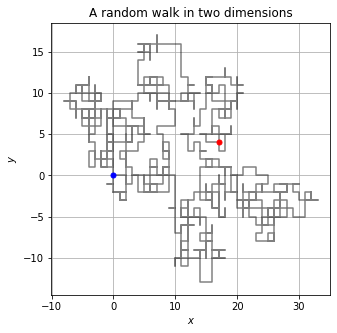

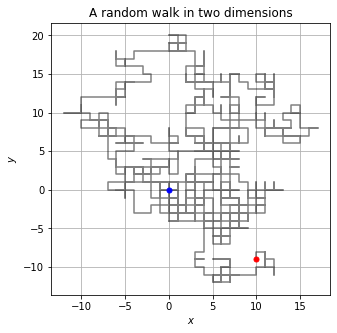

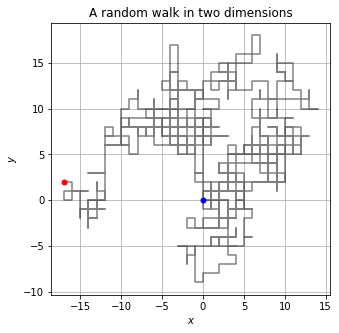

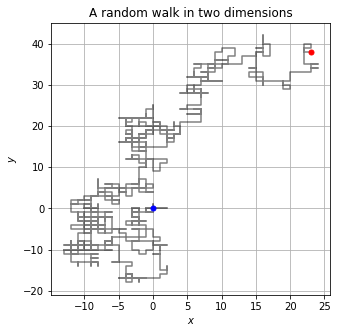

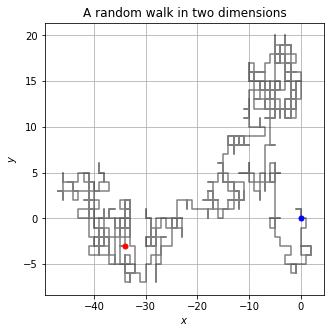

In [28]:
random_walk(1000)
random_walk(1000)
random_walk(1000)
random_walk(1000)
random_walk(1000)

Based on the three pictures of different walks, the walks and end point are varied. You can say that the walks are pretty random. However, we need to modify the function to see the average distance between the starting point and ending point.

In [69]:
def random_walk_avg(a):
  xlist = np.zeros(a) # Numpy array for x coordinates
  ylist = np.zeros(a) # Numpy array for y coordinates
  x,y = 0,0 # Starting point
  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) # This determines the direction the walk will go
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    if D[i] == 'Up':
      y += 1
    elif D[i] == 'Down':
      y -= 1
    elif D[i] == 'Left':
      x -= 1
    else:
      x += 1
  xL = xlist[len(D)-1] # Last x coordinate of the random walk
  yL = ylist[len(D)-1] # Last y coordinate of the random walk
  V = np.sqrt((xL**2) + (yL**2)) # Vector length from (0,0) to (xL, yL)
  return V

I modified the first function to find the vector length from the last $x,y$ coordinate to $(0,0)$. Now, I can use a while loop and a numpy trick to find the average of the distance between the starting point and ending point by running this function a thousand times.

In [100]:
a = []
i = 0
while i < 1001:
  b = random_walk_avg(1000)
  a.append(b)
  i += 1

c = np.array(a)
np.sum(c)/1000

27.537058874988187

Here, we used a list to add values we get from the function then changed it to a numpy array so that we can add all the terms with one line, which is the last line of the code. This time around the average distance between starting point and ending point is $27.5371...$. Moving on, we will rewrite the first function to see how many times we end up passing the starting point.

In [117]:
def random_walk_returning(a):
  xlist = np.zeros(a) # Numpy array for x coordinates
  ylist = np.zeros(a) # Numpy array for y coordinates
  x,y = 0,0 # Starting point
  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) # This determines the direction the walk will go
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    if D[i] == 'Up':
      y += 1
    elif D[i] == 'Down':
      y -= 1
    elif D[i] == 'Left':
      x -= 1
    else:
      x += 1

  t = 0 # How many times the walk ends back at the starting point
  for i in range(1, a): # A for loop to determine t
    if xlist[i] == 0 and ylist[i] == 0:
      t += 1
    else:
      t = t
  return t

In [121]:
print(random_walk_returning(1000))
print(random_walk_returning(1000))
print(random_walk_returning(1000))
print(random_walk_returning(1000))
print(random_walk_returning(1000))

1
0
2
8
9


Based on these $5$ walks, the walk does return where the walk started, and sometimes it doesn't or does many times. 

# Problem 2: Creating A Wall

In this problem, I will modify the first function once again to creat a wall on the x-axis (won't go below zero), the y-axis (won't go behind zero), and both axes (won't go below zero and behind zero). First, I will do the wall on the x-axis. 

## Wall on X-Axis

In [122]:
def random_walk_above(a):
  xlist = np.zeros(a) # Numpy array for x coordinates
  ylist = np.zeros(a) # Numpy array for y coordinates
  x,y = 0,0 # Starting point
  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) # This determines the direction the walk will go
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    if D[i] == 'Up':
      y += 1
    elif D[i] == 'Down':
      if y == 0: # This won't let the walk go below the x-axis
        y = y
      else:
        y -= 1
    elif D[i] == 'Left':
      x -= 1
    else:
      x += 1

  plt.figure(figsize = (5,5))
  plt.plot(xlist, ylist, alpha = 0.5, c = 'black')
  plt.plot(xlist[0], ylist[0], marker = '.', markersize = 10, c = 'blue') # Starting point
  plt.plot(xlist[len(D)-1], ylist[len(D)-1], marker = '.', markersize = 10, c = 'red') # End point
  plt.grid()
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.title('A random walk in two dimensions')
  plt.show()

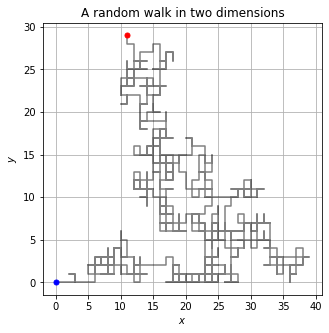

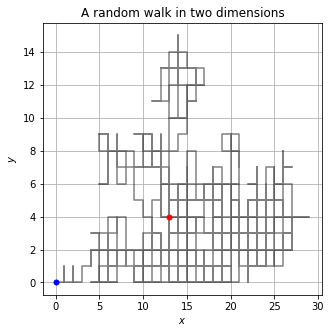

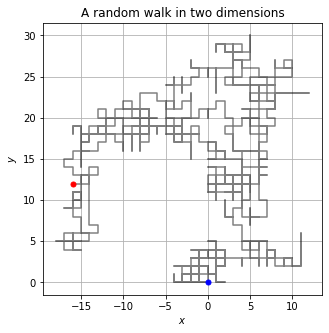

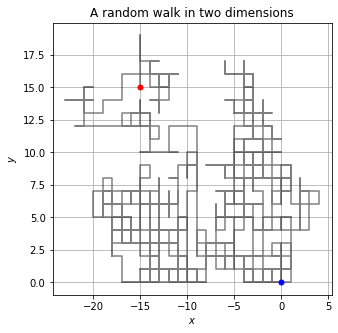

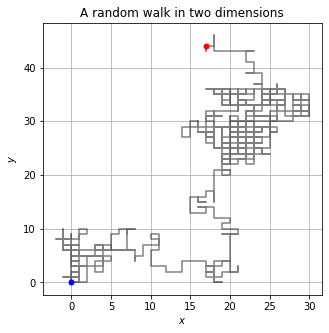

In [123]:
random_walk_above(1000)
random_walk_above(1000)
random_walk_above(1000)
random_walk_above(1000)
random_walk_above(1000)

Similarly, for 1000 cases, I will modify this function to see the average distance between the starting point and ending point, and to see if the walk ever returns to the original point.

In [124]:
def random_walk_above_avg(a):
  xlist = np.zeros(a) # Numpy array for x coordinates
  ylist = np.zeros(a) # Numpy array for y coordinates
  x,y = 0,0 # Starting point
  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) # This determines the direction the walk will go
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    if D[i] == 'Up':
      y += 1
    elif D[i] == 'Down':
      if y == 0: # This won't let the walk go below the x-axis
        y = y
      else:
        y -= 1
    elif D[i] == 'Left':
      x -= 1
    else:
      x += 1
  xL = xlist[len(D)-1] # Last x coordinate of the random walk
  yL = ylist[len(D)-1] # Last y coordinate of the random walk
  V = np.sqrt((xL**2) + (yL**2)) # Vector length from (0,0) to (xL, yL)
  return V

In [125]:
a = []
i = 0
while i < 1001:
  b = random_walk_above_avg(1000)
  a.append(b)
  i += 1

c = np.array(a)
np.sum(c)/1000

27.483036155477418

In [126]:
def random_walk_above_returning(a):
  xlist = np.zeros(a) # Numpy array for x coordinates
  ylist = np.zeros(a) # Numpy array for y coordinates
  x,y = 0,0 # Starting point
  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) # This determines the direction the walk will go
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    if D[i] == 'Up':
      y += 1
    elif D[i] == 'Down':
      if y == 0: # This won't let the walk go below the x-axis
        y = y
      else:
        y -= 1
    elif D[i] == 'Left':
      x -= 1
    else:
      x += 1

  t = 0 # How many times the walk ends back at the starting point
  for i in range(1, a): # A for loop to determine t
    if xlist[i] == 0 and ylist[i] == 0:
      t += 1
    else:
      t = t
  return t

In [127]:
print(random_walk_above_returning(1000))
print(random_walk_above_returning(1000))
print(random_walk_above_returning(1000))
print(random_walk_above_returning(1000))
print(random_walk_above_returning(1000))

2
1
4
0
14


## Wall on Y-Axis

Now, the function that has the wall on the y-axis.



In [128]:
def random_walk_after(a):
  xlist = np.zeros(a) # Numpy array for x coordinates
  ylist = np.zeros(a) # Numpy array for y coordinates
  x,y = 0,0 # Starting point
  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) # This determines the direction the walk will go
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    if D[i] == 'Up':
      y += 1
    elif D[i] == 'Down':
        y -= 1
    elif D[i] == 'Left':
      if x == 0:
        x = x
      else:
        x -= 1
    else:
      x += 1

  plt.figure(figsize = (5,5))
  plt.plot(xlist, ylist, alpha = 0.5, c = 'black')
  plt.plot(xlist[0], ylist[0], marker = '.', markersize = 10, c = 'blue') # Starting point
  plt.plot(xlist[len(D)-1], ylist[len(D)-1], marker = '.', markersize = 10, c = 'red') # End point
  plt.grid()
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.title('A random walk in two dimensions')
  plt.show()

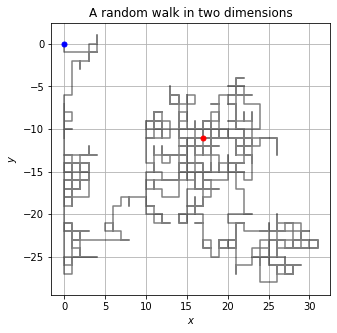

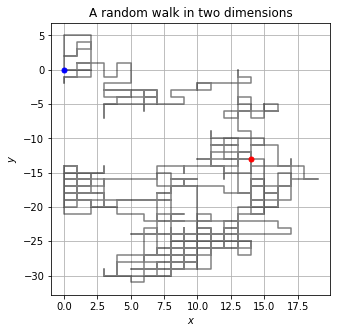

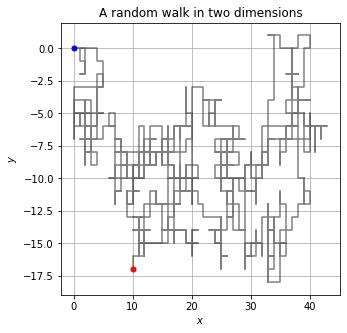

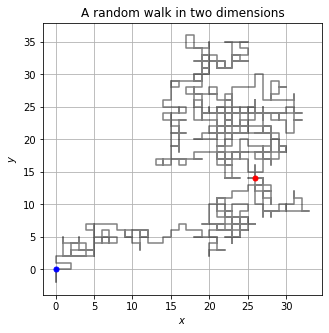

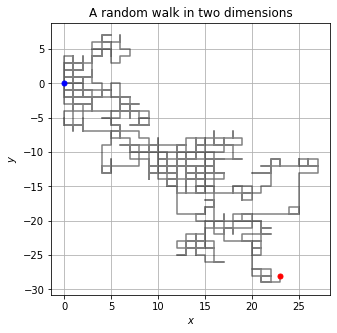

In [129]:
random_walk_after(1000)
random_walk_after(1000)
random_walk_after(1000)
random_walk_after(1000)
random_walk_after(1000)

Similarly, for 1000 cases, I will modify this function to see the average distance between the starting point and ending point, and to see if the walk ever returns to the original point.

In [130]:
def random_walk_after_avg(a):
  xlist = np.zeros(a) # Numpy array for x coordinates
  ylist = np.zeros(a) # Numpy array for y coordinates
  x,y = 0,0 # Starting point
  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) # This determines the direction the walk will go
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    if D[i] == 'Up':
      y += 1
    elif D[i] == 'Down':
        y -= 1
    elif D[i] == 'Left':
      if x == 0:
        x = x
      else:
        x -= 1
    else:
      x += 1
  xL = xlist[len(D)-1] # Last x coordinate of the random walk
  yL = ylist[len(D)-1] # Last y coordinate of the random walk
  V = np.sqrt((xL**2) + (yL**2)) # Vector length from (0,0) to (xL, yL)
  return V

In [131]:
a = []
i = 0
while i < 1001:
  b = random_walk_after_avg(1000)
  a.append(b)
  i += 1

c = np.array(a)
np.sum(c)/1000

27.73434353852972

In [132]:
def random_walk_after_returning(a):
  xlist = np.zeros(a) # Numpy array for x coordinates
  ylist = np.zeros(a) # Numpy array for y coordinates
  x,y = 0,0 # Starting point
  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) # This determines the direction the walk will go
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    if D[i] == 'Up':
      y += 1
    elif D[i] == 'Down':
        y -= 1
    elif D[i] == 'Left':
      if x == 0:
        x = x
      else:
        x -= 1
    else:
      x += 1

  t = 0 # How many times the walk ends back at the starting point
  for i in range(1, a): # A for loop to determine t
    if xlist[i] == 0 and ylist[i] == 0:
      t += 1
    else:
      t = t
  return t

In [134]:
print(random_walk_after_returning(1000))
print(random_walk_after_returning(1000))
print(random_walk_after_returning(1000))
print(random_walk_after_returning(1000))
print(random_walk_after_returning(1000))

1
16
0
13
6


## Wall on Both Axes

Now, the function that has the wall on the both axes.

In [135]:
def random_walk_both(a):
  xlist = np.zeros(a) # Numpy array for x coordinates
  ylist = np.zeros(a) # Numpy array for y coordinates
  x,y = 0,0 # Starting point
  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) # This determines the direction the walk will go
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    if D[i] == 'Up':
      y += 1
    elif D[i] == 'Down':
      if y == 0:
        y = y
      else:
        y -= 1
    elif D[i] == 'Left':
      if x == 0:
        x = x
      else:
        x -= 1
    else:
      x += 1

  plt.figure(figsize = (5,5))
  plt.plot(xlist, ylist, alpha = 0.5, c = 'black')
  plt.plot(xlist[0], ylist[0], marker = '.', markersize = 10, c = 'blue') # Starting point
  plt.plot(xlist[len(D)-1], ylist[len(D)-1], marker = '.', markersize = 10, c = 'red') # End point
  plt.grid()
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.title('A random walk in two dimensions')
  plt.show()

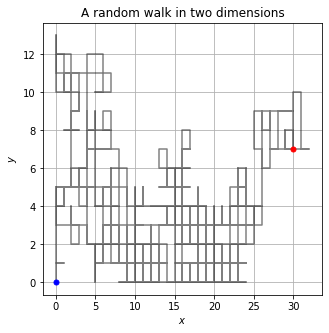

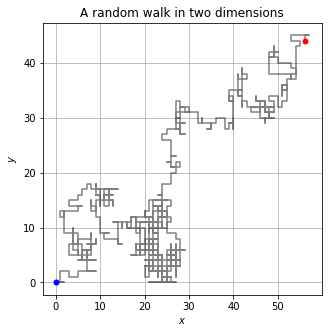

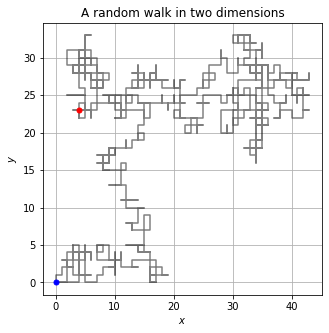

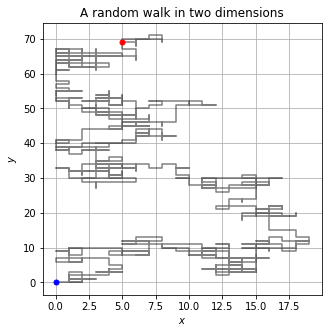

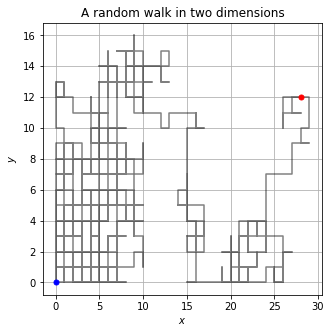

In [136]:
random_walk_both(1000)
random_walk_both(1000)
random_walk_both(1000)
random_walk_both(1000)
random_walk_both(1000)

Similarly, for 1000 cases, I will modify this function to see the average distance between the starting point and ending point, and to see if the walk ever returns to the original point.

In [137]:
def random_walk_both_avg(a):
  xlist = np.zeros(a) # Numpy array for x coordinates
  ylist = np.zeros(a) # Numpy array for y coordinates
  x,y = 0,0 # Starting point
  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) # This determines the direction the walk will go
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    if D[i] == 'Up':
      y += 1
    elif D[i] == 'Down':
      if y == 0:
        y = y
      else:
        y -= 1
    elif D[i] == 'Left':
      if x == 0:
        x = x
      else:
        x -= 1
    else:
      x += 1
  xL = xlist[len(D)-1] # Last x coordinate of the random walk
  yL = ylist[len(D)-1] # Last y coordinate of the random walk
  V = np.sqrt((xL**2) + (yL**2)) # Vector length from (0,0) to (xL, yL)
  return V

In [138]:
a = []
i = 0
while i < 1001:
  b = random_walk_both_avg(1000)
  a.append(b)
  i += 1

c = np.array(a)
np.sum(c)/1000

27.465003692330196

In [139]:
def random_walk_both_returning(a):
  xlist = np.zeros(a) # Numpy array for x coordinates
  ylist = np.zeros(a) # Numpy array for y coordinates
  x,y = 0,0 # Starting point
  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) # This determines the direction the walk will go
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    if D[i] == 'Up':
      y += 1
    elif D[i] == 'Down':
      if y == 0:
        y = y
      else:
        y -= 1
    elif D[i] == 'Left':
      if x == 0:
        x = x
      else:
        x -= 1
    else:
      x += 1

  t = 0 # How many times the walk ends back at the starting point
  for i in range(1, a): # A for loop to determine t
    if xlist[i] == 0 and ylist[i] == 0:
      t += 1
    else:
      t = t
  return t

In [140]:
print(random_walk_both_returning(1000))
print(random_walk_both_returning(1000))
print(random_walk_both_returning(1000))
print(random_walk_both_returning(1000))
print(random_walk_both_returning(1000))

4
8
3
0
5


## Findings

Based on this three cases (a wall on the x-axis, a wall on the y-axis, and a wall on both axes) and the original function with no wall, all functions, when runned for 1000 times each, have a typical distance between starting point and ending point is around $27-28$, and have times when they do return to the place where the walk started.   

# Problem 3: Molecules of Gas

In this problem, I will use a function similar to the function for the wall on the y-axis to create a floor where molecules can bounce off from. With this in mind, gravity will be considered so I will include a slight preference for moving down. 

In [158]:
def random_bounce(a):
  xlist = np.zeros(a) # Numpy array for x coordinates
  ylist = np.zeros(a) # Numpy array for y coordinates
  x,y = 0,0 # Starting point
  D = np.random.choice(['Up', 'Down'], a) # This determines the direction the bounce will go 
  for i in range(len(D)):
    xlist[i] += i # Since there's no wall, the bounce will go on the postive x-axis
    ylist[i] = y
    if D[i] == 'Up':
      y += 1
    else:
      if y == 0:
        y = y
      elif y == 1:
        y -= 1
      else:
        y -= 2 # Since gravity is involved, the down would be two instead of one, more than 'Up'
  
  plt.figure(figsize = (10,10))
  plt.plot(xlist, ylist, alpha = 0.5, c = 'black')
  plt.plot(xlist[0], ylist[0], marker = '.', markersize = 10, c = 'blue') # Starting point
  plt.plot(xlist[len(D)-1], ylist[len(D)-1], marker = '.', markersize = 10, c = 'red') # End point
  plt.grid()
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.title('Molecules of gas')
  plt.show()

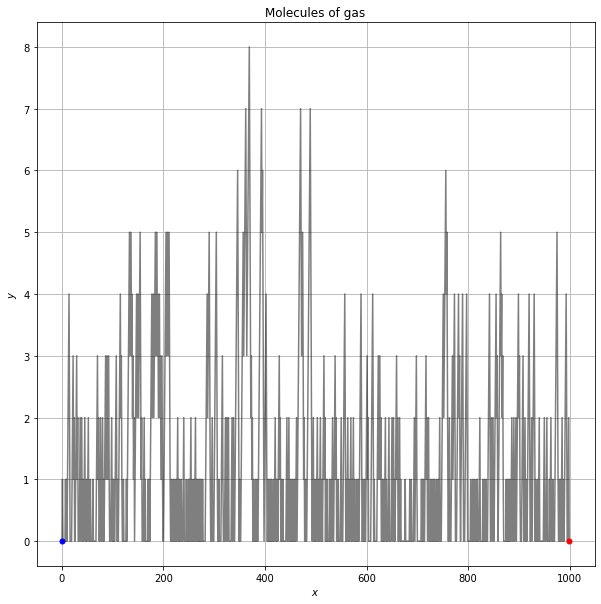

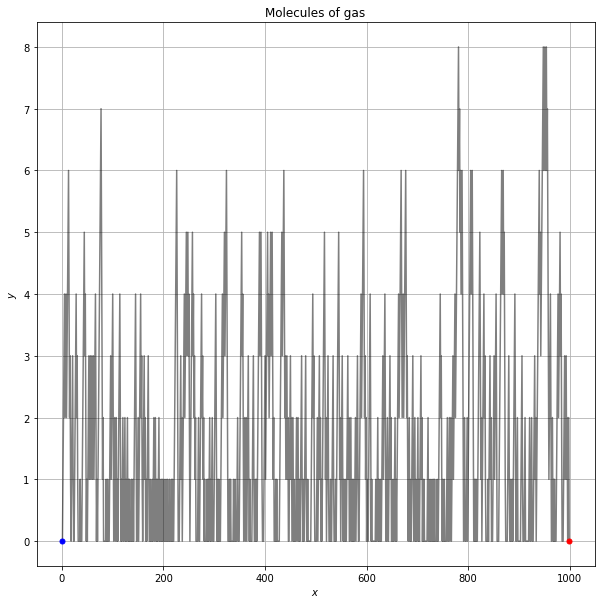

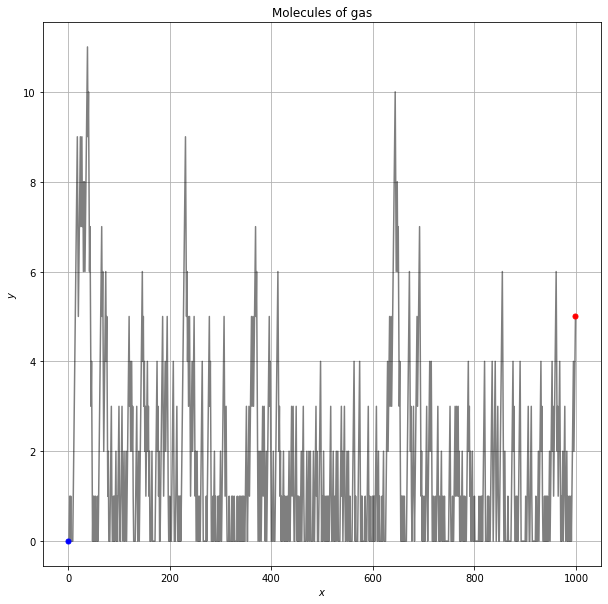

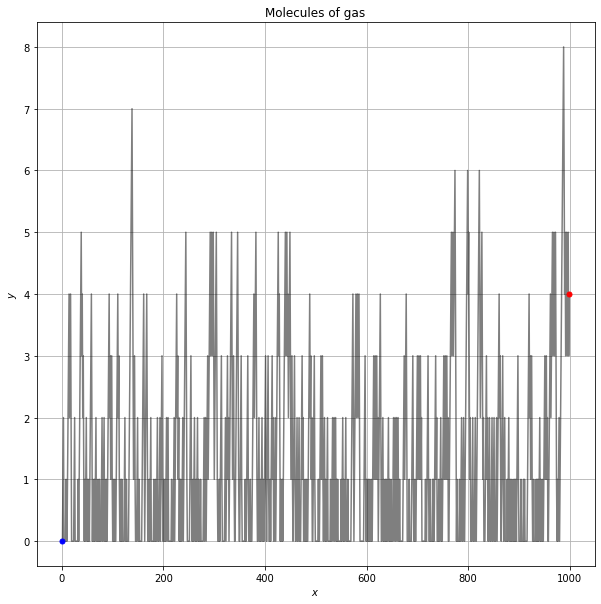

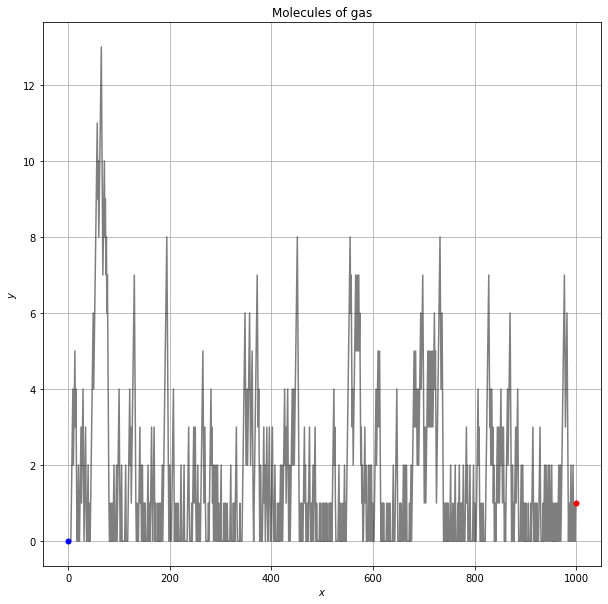

In [159]:
random_bounce(1000)
random_bounce(1000)
random_bounce(1000)
random_bounce(1000)
random_bounce(1000)

It is a bit crowded because of the figure but it shows the randominess of the molecule of gas and where it will end if it randomly moves up and down with gravity. 

# Problem 4: Molecules in a Box

In this problem, I will use a function similar to the function for the wall on the both axes to create a box where molecules can bounce off from the floor, walls, and ceiling. With this in mind, gravity will be considered so I will include a slight preference for moving down. Since we are making a box, I will require the user to enter the length and width of the rectangle so that the walk doesn't exceed these values.  

In [176]:
def random_walk_box(a):
  W = int(input('Enter width of the rectangle: '))
  L = int(input('Enter length of the rectangle: '))
  xlist = np.zeros(a) # Numpy array for x coordinates
  ylist = np.zeros(a) # Numpy array for y coordinates
  x,y = 0,0 # Starting point
  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) # This determines the direction the bounce will go 
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    if D[i] == 'Up':
      if y == W:
        y -= 1
      else:
        y += 1
    elif D[i] == 'Down':
      if y == 0:
        y += 1
      else:
        y -= 1
    elif D[i] == 'Left':
      if x == 0:
        x += 1
      else:
        x -= 1
    else:
      if x == L:
        x -= 1
      else:
        x += 1
  
  plt.figure(figsize = (5,5))
  plt.plot(xlist, ylist, alpha = 0.5, c = 'black')
  plt.plot(xlist[0], ylist[0], marker = '.', markersize = 10, c = 'blue') # Starting point
  plt.plot(xlist[len(D)-1], ylist[len(D)-1], marker = '.', markersize = 10, c = 'red') # End point
  plt.grid()
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.title('Walking in a box')
  plt.show()

Enter width of the rectangle: 5
Enter length of the rectangle: 10


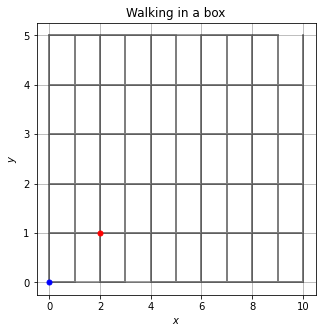

Enter width of the rectangle: 10
Enter length of the rectangle: 15


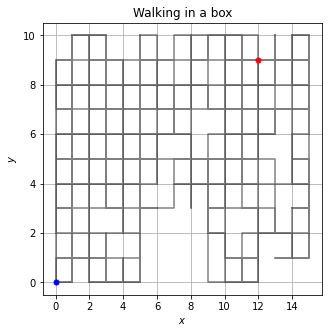

Enter width of the rectangle: 15
Enter length of the rectangle: 20


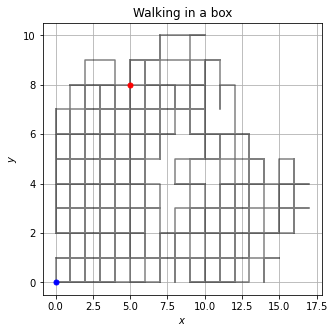

Enter width of the rectangle: 20
Enter length of the rectangle: 25


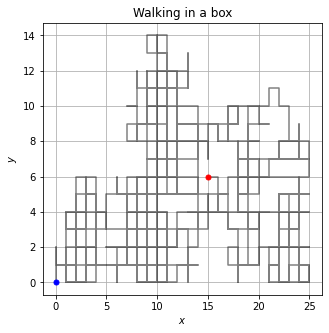

Enter width of the rectangle: 25
Enter length of the rectangle: 30


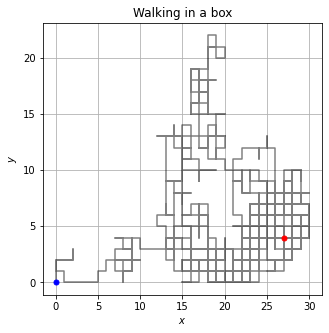

In [177]:
random_walk_box(1000)
random_walk_box(1000)
random_walk_box(1000)
random_walk_box(1000)
random_walk_box(1000)

In [197]:
def random_walk_box_avg(a):
  W = 25
  L = 30
  xlist = np.zeros(a) # Numpy array for x coordinates
  ylist = np.zeros(a) # Numpy array for y coordinates
  x,y = 0,0 # Starting point
  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) # This determines the direction the bounce will go 
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    if D[i] == 'Up':
      if y == W:
        y -= 1
      else:
        y += 1
    elif D[i] == 'Down':
      if y == 0:
        y += 1
      else:
        y -= 1
    elif D[i] == 'Left':
      if x == 0:
        x += 1
      else:
        x -= 1
    else:
      if x == L:
        x -= 1
      else:
        x += 1
  xL = xlist[len(D)-1] # Last x coordinate of the random walk
  yL = ylist[len(D)-1] # Last y coordinate of the random walk
  V = np.sqrt((xL**2) + (yL**2)) # Vector length from (0,0) to (xL, yL)
  return V

In [198]:
a = []
i = 0
while i < 1001:
  b = random_walk_box_avg(1000)
  a.append(b)
  i += 1

c = np.array(a)
np.sum(c)/1000

20.419606013422353

I did $5$ cases where the rectangles where the same as the plots above: (W = 5 and L = 10, W = 10 and L = 15, W = 15 and L = 20, W = 20 and L = 25, W = 25 and L = 30). Averages were: Case 1 (5.97432), Case 2 (9.68280), Case 3 (13.71993), Case 4 (17.29488), and Case 5 (20.41960).

In [201]:
def random_walk_box_returning(a):
  W = int(input('Enter width of the rectangle: '))
  L = int(input('Enter length of the rectangle: '))
  xlist = np.zeros(a) # Numpy array for x coordinates
  ylist = np.zeros(a) # Numpy array for y coordinates
  x,y = 0,0 # Starting point
  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) # This determines the direction the bounce will go 
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    if D[i] == 'Up':
      if y == W:
        y -= 1
      else:
        y += 1
    elif D[i] == 'Down':
      if y == 0:
        y += 1
      else:
        y -= 1
    elif D[i] == 'Left':
      if x == 0:
        x += 1
      else:
        x -= 1
    else:
      if x == L:
        x -= 1
      else:
        x += 1
  t = 0 # How many times the walk ends back at the starting point
  for i in range(1, a): # A for loop to determine t
    if xlist[i] == 0 and ylist[i] == 0:
      t += 1
    else:
      t = t
  return t

In [202]:
print(random_walk_box_returning(1000))
print(random_walk_box_returning(1000))
print(random_walk_box_returning(1000))
print(random_walk_box_returning(1000))
print(random_walk_box_returning(1000))

Enter width of the rectangle: 5
Enter length of the rectangle: 10
9
Enter width of the rectangle: 10
Enter length of the rectangle: 15
4
Enter width of the rectangle: 15
Enter length of the rectangle: 20
1
Enter width of the rectangle: 20
Enter length of the rectangle: 25
2
Enter width of the rectangle: 25
Enter length of the rectangle: 30
0


In [203]:
print(random_walk_box_returning(1000))

Enter width of the rectangle: 25
Enter length of the rectangle: 30
8


## Findings

As the area of the rectangle grew, the distance between starting point and ending point did as well for five different rectangles. Like the cases in problem 2, no matter the area of the rectangle, the walk does return to where it first started.

# Problem 5: Two people walking

In this problem, we will have two people walking at the same time. They will start at different places. I will look at when the second person is on either of the three corners, while the first person starts at (0,0) as usual. I will first look at when the second person starts from the opposite corner of the rectangle.

In [224]:
def random_two_walk_1(a):
  L = int(input('Enter length of the rectangle: '))
  W = int(input('Enter width of the rectangle: '))
  xlist = np.zeros(a)
  ylist = np.zeros(a)
  x2list = np.zeros(a)
  y2list = np.zeros(a)
  x,y = 0,0 # Starting point
  x2,y2 = L,W # Second person starting at the opposite corner of the rectangle.

  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) 
  D2 = np.random.choice(['Up', 'Down', 'Left', 'Right'], a)
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    x2list[i] = x2
    y2list[i] = y2
    if D[i] == 'Right' or D2[i] == 'Left' or D[i] == 'Left' or D2[i] == 'Right':
      if D[i] == 'Right' and D[i] == 'Right':
        x += 1
        x2 += 1
        if x > L and x2 > L:
          x -= 1
          x2 -= 1
        elif x > L:
          x -= 1
        elif x2 > L:
          x2 -= 1
        else:
          x, x2 = x, x2
      elif D[i] == 'Left' and D[i] == 'Left':
        x -= 1
        x2 -= 1
        if x < 0 and x2 < 0:
          x += 1
          x2 += 1
        elif x < 0:
          x += 1
        elif x2 < 0:
          x2 += 1
        else:
          x, x2 = x, x2
      elif D[i] == 'Right' and D[i] == 'Left':
        x += 1
        x2 -= 1
        if x > L and x2 < 0:
          x -= 1
          x2 += 1
        elif x > L:
          x -= 1
        elif x2 < 0:
          x2 += 1
        elif x == x2:
          x -= 1
          x2 += 1
        else:
          x, x2 = x, x2
      else:
        x -= 1
        x2 += 1
        if x < 0 and x2 > L:
          x += 1
          x2 -= 1
        elif x < 0:
          x += 1
        elif x2 > L:
          x2 -= 1
        elif x == x2:
          x += 1
          x2 -= 1
        else:
          x, x2 = x, x2
    elif D[i] == 'Up' or D2[i] == 'Down' or D[i] == 'Down' or D2[i] == 'Up':
      if D[i] == 'Up' and D[i] == 'Up':
        y += 1
        y2 += 1
        if y > W and y2 > W:
          y -= 1
          y2 -= 1
        elif y > W:
          y -= 1
        elif y2 > W:
          y2 -= 1
        else:
          y, y2 = y, y2
      elif D[i] == 'Down' and D[i] == 'Down':
        y -= 1
        y2 -= 1
        if y < 0 and y2 < 0:
          y += 1
          y2 += 1
        elif y < 0:
          y += 1
        elif y2 < 0:
          y2 += 1
        else:
          y, y2 = y, y2
      elif D[i] == 'Up' and D[i] == 'Down':
        y += 1
        y2 -= 1
        if y > W and y2 < 0:
          y -= 1
          y2 += 1
        elif y > W:
          y -= 1
        elif y2 < 0:
          y2 += 1
        elif y == y2:
          y -= 1
          y2 += 1
        else:
          y, y2 = y, y2
      else:
        y -= 1
        y2 += 1
        if y < 0 and y2 > W:
          y += 1
          y2 -= 1
        elif y < 0:
          y += 1
        elif y2 > W:
          y2 -= 1
        elif y == y2:
          y += 1
          y2 -= 1
        else:
          y, y2 = y, y2
  
  plt.figure(figsize = (5,5))
  plt.plot(xlist, ylist, alpha = 0.5, c = 'blue')
  plt.plot(x2list, y2list, alpha = 0.5, c = 'green')
  plt.plot(xlist[0], ylist[0], marker = '.', markersize = 10, c = 'red') # Starting point
  plt.plot(x2list[0], y2list[0], marker = '.', markersize = 10, c = 'purple') # Starting point
  plt.plot(xlist[len(D)-1], ylist[len(D)-1], marker = '.', markersize = 10, c = 'orange') # End point
  plt.plot(x2list[len(D)-1], y2list[len(D)-1], marker = '.', markersize = 10, c = 'black') # End point
  plt.grid()
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.title('Walking in a box')
  plt.show()

Enter length of the rectangle: 5
Enter width of the rectangle: 10


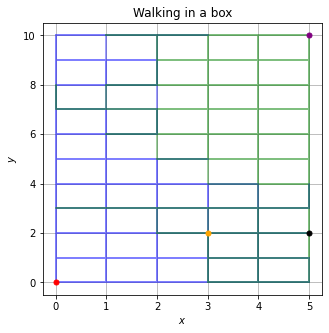

None
Enter length of the rectangle: 10
Enter width of the rectangle: 15


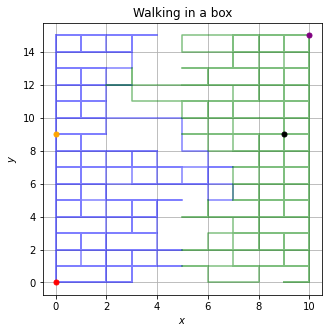

None
Enter length of the rectangle: 15
Enter width of the rectangle: 20


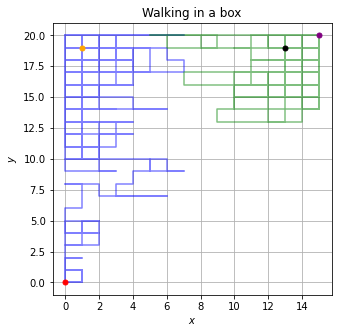

None
Enter length of the rectangle: 20
Enter width of the rectangle: 25


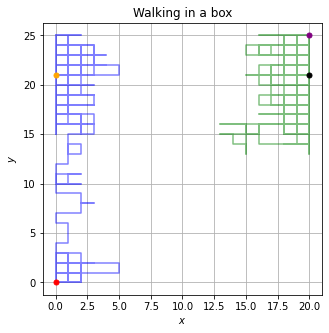

None
Enter length of the rectangle: 25
Enter width of the rectangle: 30


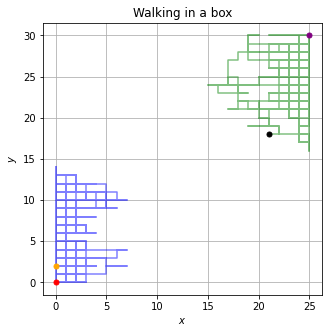

None


In [227]:
print(random_two_walk_1(1000))
print(random_two_walk_1(1000))
print(random_two_walk_1(1000))
print(random_two_walk_1(1000))
print(random_two_walk_1(1000))

Now, I am placing the second person at $(L,0)$.

In [228]:
def random_two_walk_2(a):
  L = int(input('Enter length of the rectangle: '))
  W = int(input('Enter width of the rectangle: '))
  xlist = np.zeros(a)
  ylist = np.zeros(a)
  x2list = np.zeros(a)
  y2list = np.zeros(a)
  x,y = 0,0 # Starting point
  x2,y2 = L,0 # Second person starting at the opposite side of the rectangle.

  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) 
  D2 = np.random.choice(['Up', 'Down', 'Left', 'Right'], a)
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    x2list[i] = x2
    y2list[i] = y2
    if D[i] == 'Right' or D2[i] == 'Left' or D[i] == 'Left' or D2[i] == 'Right':
      if D[i] == 'Right' and D[i] == 'Right':
        x += 1
        x2 += 1
        if x > L and x2 > L:
          x -= 1
          x2 -= 1
        elif x > L:
          x -= 1
        elif x2 > L:
          x2 -= 1
        else:
          x, x2 = x, x2
      elif D[i] == 'Left' and D[i] == 'Left':
        x -= 1
        x2 -= 1
        if x < 0 and x2 < 0:
          x += 1
          x2 += 1
        elif x < 0:
          x += 1
        elif x2 < 0:
          x2 += 1
        else:
          x, x2 = x, x2
      elif D[i] == 'Right' and D[i] == 'Left':
        x += 1
        x2 -= 1
        if x > L and x2 < 0:
          x -= 1
          x2 += 1
        elif x > L:
          x -= 1
        elif x2 < 0:
          x2 += 1
        elif x == x2:
          x -= 1
          x2 += 1
        else:
          x, x2 = x, x2
      else:
        x -= 1
        x2 += 1
        if x < 0 and x2 > L:
          x += 1
          x2 -= 1
        elif x < 0:
          x += 1
        elif x2 > L:
          x2 -= 1
        elif x == x2:
          x += 1
          x2 -= 1
        else:
          x, x2 = x, x2
    elif D[i] == 'Up' or D2[i] == 'Down' or D[i] == 'Down' or D2[i] == 'Up':
      if D[i] == 'Up' and D[i] == 'Up':
        y += 1
        y2 += 1
        if y > W and y2 > W:
          y -= 1
          y2 -= 1
        elif y > W:
          y -= 1
        elif y2 > W:
          y2 -= 1
        else:
          y, y2 = y, y2
      elif D[i] == 'Down' and D[i] == 'Down':
        y -= 1
        y2 -= 1
        if y < 0 and y2 < 0:
          y += 1
          y2 += 1
        elif y < 0:
          y += 1
        elif y2 < 0:
          y2 += 1
        else:
          y, y2 = y, y2
      elif D[i] == 'Up' and D[i] == 'Down':
        y += 1
        y2 -= 1
        if y > W and y2 < 0:
          y -= 1
          y2 += 1
        elif y > W:
          y -= 1
        elif y2 < 0:
          y2 += 1
        elif y == y2:
          y -= 1
          y2 += 1
        else:
          y, y2 = y, y2
      else:
        y -= 1
        y2 += 1
        if y < 0 and y2 > W:
          y += 1
          y2 -= 1
        elif y < 0:
          y += 1
        elif y2 > W:
          y2 -= 1
        elif y == y2:
          y += 1
          y2 -= 1
        else:
          y, y2 = y, y2
  
  plt.figure(figsize = (5,5))
  plt.plot(xlist, ylist, alpha = 0.5, c = 'blue')
  plt.plot(x2list, y2list, alpha = 0.5, c = 'green')
  plt.plot(xlist[0], ylist[0], marker = '.', markersize = 10, c = 'red') # Starting point
  plt.plot(x2list[0], y2list[0], marker = '.', markersize = 10, c = 'purple') # Starting point
  plt.plot(xlist[len(D)-1], ylist[len(D)-1], marker = '.', markersize = 10, c = 'orange') # End point
  plt.plot(x2list[len(D)-1], y2list[len(D)-1], marker = '.', markersize = 10, c = 'black') # End point
  plt.grid()
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.title('Walking in a box')
  plt.show()

Enter length of the rectangle: 5
Enter width of the rectangle: 10


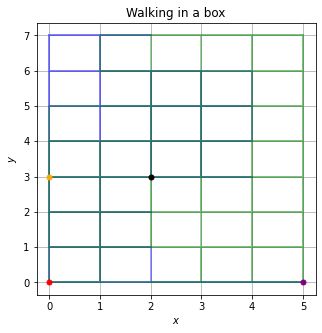

None
Enter length of the rectangle: 10
Enter width of the rectangle: 15


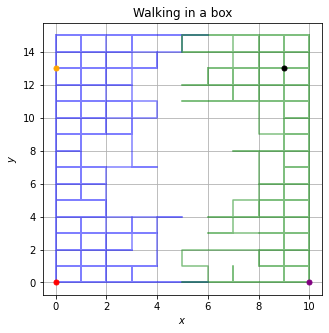

None
Enter length of the rectangle: 15
Enter width of the rectangle: 20


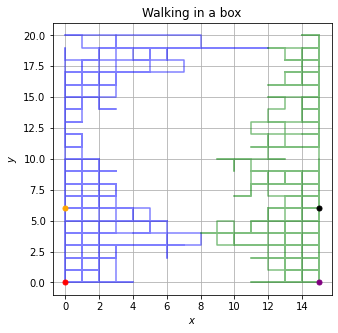

None
Enter length of the rectangle: 20
Enter width of the rectangle: 25


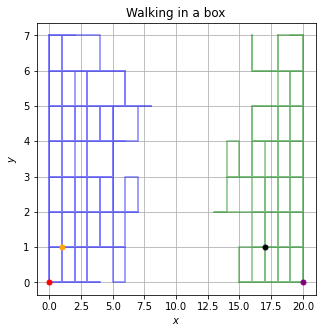

None
Enter length of the rectangle: 25
Enter width of the rectangle: 30


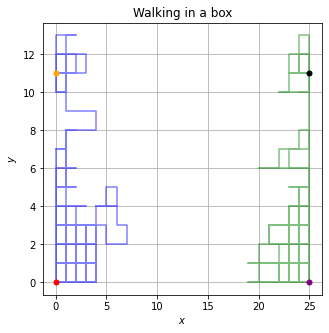

None


In [230]:
print(random_two_walk_2(1000))
print(random_two_walk_2(1000))
print(random_two_walk_2(1000))
print(random_two_walk_2(1000))
print(random_two_walk_2(1000))

Lastly, I am placing the second person at $(0,W)$.

In [232]:
def random_two_walk_3(a):
  L = int(input('Enter length of the rectangle: '))
  W = int(input('Enter width of the rectangle: '))
  xlist = np.zeros(a)
  ylist = np.zeros(a)
  x2list = np.zeros(a)
  y2list = np.zeros(a)
  x,y = 0,0 # Starting point
  x2,y2 = 0,W # Second person starting at the opposite side of the rectangle.

  D = np.random.choice(['Up', 'Down', 'Left', 'Right'], a) 
  D2 = np.random.choice(['Up', 'Down', 'Left', 'Right'], a)
  for i in range(len(D)):
    xlist[i] = x
    ylist[i] = y
    x2list[i] = x2
    y2list[i] = y2
    if D[i] == 'Right' or D2[i] == 'Left' or D[i] == 'Left' or D2[i] == 'Right':
      if D[i] == 'Right' and D[i] == 'Right':
        x += 1
        x2 += 1
        if x > L and x2 > L:
          x -= 1
          x2 -= 1
        elif x > L:
          x -= 1
        elif x2 > L:
          x2 -= 1
        else:
          x, x2 = x, x2
      elif D[i] == 'Left' and D[i] == 'Left':
        x -= 1
        x2 -= 1
        if x < 0 and x2 < 0:
          x += 1
          x2 += 1
        elif x < 0:
          x += 1
        elif x2 < 0:
          x2 += 1
        else:
          x, x2 = x, x2
      elif D[i] == 'Right' and D[i] == 'Left':
        x += 1
        x2 -= 1
        if x > L and x2 < 0:
          x -= 1
          x2 += 1
        elif x > L:
          x -= 1
        elif x2 < 0:
          x2 += 1
        elif x == x2:
          x -= 1
          x2 += 1
        else:
          x, x2 = x, x2
      else:
        x -= 1
        x2 += 1
        if x < 0 and x2 > L:
          x += 1
          x2 -= 1
        elif x < 0:
          x += 1
        elif x2 > L:
          x2 -= 1
        elif x == x2:
          x += 1
          x2 -= 1
        else:
          x, x2 = x, x2
    elif D[i] == 'Up' or D2[i] == 'Down' or D[i] == 'Down' or D2[i] == 'Up':
      if D[i] == 'Up' and D[i] == 'Up':
        y += 1
        y2 += 1
        if y > W and y2 > W:
          y -= 1
          y2 -= 1
        elif y > W:
          y -= 1
        elif y2 > W:
          y2 -= 1
        else:
          y, y2 = y, y2
      elif D[i] == 'Down' and D[i] == 'Down':
        y -= 1
        y2 -= 1
        if y < 0 and y2 < 0:
          y += 1
          y2 += 1
        elif y < 0:
          y += 1
        elif y2 < 0:
          y2 += 1
        else:
          y, y2 = y, y2
      elif D[i] == 'Up' and D[i] == 'Down':
        y += 1
        y2 -= 1
        if y > W and y2 < 0:
          y -= 1
          y2 += 1
        elif y > W:
          y -= 1
        elif y2 < 0:
          y2 += 1
        elif y == y2:
          y -= 1
          y2 += 1
        else:
          y, y2 = y, y2
      else:
        y -= 1
        y2 += 1
        if y < 0 and y2 > W:
          y += 1
          y2 -= 1
        elif y < 0:
          y += 1
        elif y2 > W:
          y2 -= 1
        elif y == y2:
          y += 1
          y2 -= 1
        else:
          y, y2 = y, y2
  
  plt.figure(figsize = (5,5))
  plt.plot(xlist, ylist, alpha = 0.5, c = 'blue')
  plt.plot(x2list, y2list, alpha = 0.5, c = 'green')
  plt.plot(xlist[0], ylist[0], marker = '.', markersize = 10, c = 'red') # Starting point
  plt.plot(x2list[0], y2list[0], marker = '.', markersize = 10, c = 'purple') # Starting point
  plt.plot(xlist[len(D)-1], ylist[len(D)-1], marker = '.', markersize = 10, c = 'orange') # End point
  plt.plot(x2list[len(D)-1], y2list[len(D)-1], marker = '.', markersize = 10, c = 'black') # End point
  plt.grid()
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.title('Walking in a box')
  plt.show()

Enter length of the rectangle: 5
Enter width of the rectangle: 10


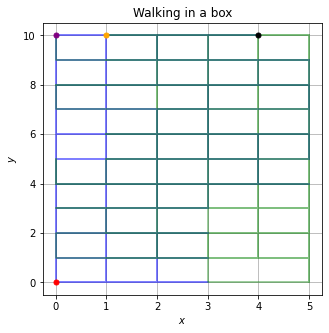

None
Enter length of the rectangle: 10
Enter width of the rectangle: 15


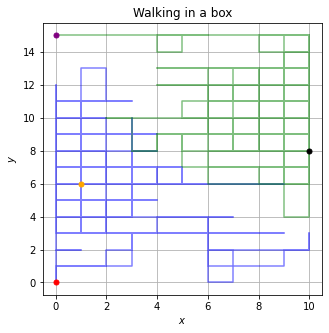

None
Enter length of the rectangle: 15
Enter width of the rectangle: 20


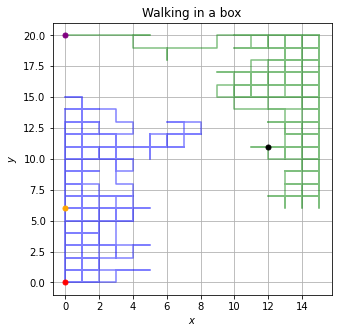

None
Enter length of the rectangle: 20
Enter width of the rectangle: 25


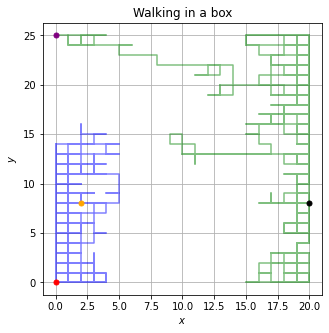

None
Enter length of the rectangle: 25
Enter width of the rectangle: 30


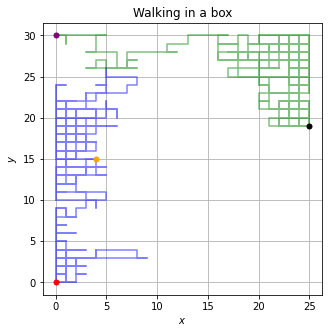

None


In [235]:
print(random_two_walk_3(1000))
print(random_two_walk_3(1000))
print(random_two_walk_3(1000))
print(random_two_walk_3(1000))
print(random_two_walk_3(1000))

## Findings

For all the three cases: The smaller the area of the rectangle is, the more chances the two people will have to bounce off each other and overlap each other's lines. The bigger the area of the rectangle is, the less chances they have to both, sometimes not even overlapping each other's lines. 

# Overall Findings

Although I wasn't able to produce an image with PIL, it was interesting seeing the different graphs made with these codes. The endpoints were distributed randomly, which created random, but interesting graphs of the walks. Based on the walks, for 1000 times, the typical distance were similar when there was no wall or floor, a floor, a wall, or both. The typical distance between starting point and ending point varied in between $27-28$, and they all also were able to return the starting point. However, the typical distance varied based on the area of the box the walk was performed. Lastly, two people walking felt like Tron to me, which I kinda can see, but end close to bounce off each other and overlap each other's lines. It's all interesting to see. Unfortunately, if only I could see it in PIL.